## ASSIGNMENT 3

## Linear models for classification problems

Classification — The act of dividing an input space into a collection of labelled regions using decision boundaries. 

Linear Approach — Use of a straight line to partition a dataset. Intuitively this is easiest in terms of both describing the partition (“If it falls on one side of the line class as A, if it falls on the side class as B”) and performing the cut [1]. 

An example of discriminative training of linear classifiers is Logistic Regression [2].

Logistic regression—maximum likelihood estimation of $\vec{\mathbf{w}}$ assuming that the observed training set was generated by a binomial model that depends on the output of the classifier.

This assignment has 2 parts as follows:

**Part 1.** You will implement your own classifier for **Logistic Regression** (50 points) for 2 class classification using the dataset provided for Part 1 (pls. check the shared files). Check the performance of this algorithm with the classification accuracy.

**Part 2.** You will implement your own **Multinomial Logistic Regression** (50 points) classifier for multiclass data. The multinomial logistic regression algorithm is an extension to the logistic regression model that involves changing the loss function to cross-entropy loss and predicting the probability distribution as a multinomial probability distribution to natively support multi-class classification problems [3]. Check the performance of this algorithm with the classification accuracy.

**_Preprocessing the datasets_**:

**Encoding**

Machine learning models require all input and output variables to be numeric.

This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model. You can use One-Hot Encoding is available in the scikit-learn Python machine learning library via the OneHotEncoder class[4]. 

**Data standardization [5]**

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. One of the most popular techniques for scaling numerical data prior to modeling is standardization. 

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values ($\mu$) is 0 and the standard deviation ($\sigma$) is 1. A value is standardized as follows:

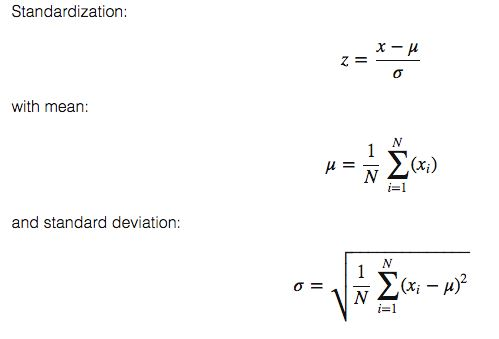

This can be thought of as subtracting the mean value or centering the data.

**Important Remarks:**

You are provided the necessary preprocessing codes as separate notebooks for both datasets that you are going to work with in this assignment. Please check the shared notebooks first before beginning to work with your own algorithms. Note that, in these notebooks, you are also provided with the binary and multinomial logistic regression performances of  of the sklearn library as a baseline for your own implementations. You will be implementing your own solutions that comprise of the necessary training procedures and the codes to train your models for each part before submission.  

**Steps for all parts:**

- Check the data has any null values or not. 
- Check if in the data, some of our columns have numeric values and some of them have categorical values.  To work with categorical variables you need to encode them to prepare this data for the machine learning algorithms.
- Split your data into train and test sets with a ratio of 80:20 with seed=1.
- Apply the data standardization technique to the datasets to standardize the input variables.
- Build your models with your own implemenation (with proper comments and explanations) using the training set.
- Report these classification models according to their accuracy over the test set. Comment on their classification performance.
- Finally, plot confusion matrices for your models over the test set, and comment on the outcomes.



[1]: https://towardsdatascience.com/classification-a-linear-approach-part-1-b080c13992dd

[2]: https://en.wikipedia.org/wiki/Linear_classifier

[3]: https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

[4]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

[5]: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

In [1]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



def preprocess(data):
    # Check if there are some null values
    print(data.isna().sum())
    
    # Fill the null values in a category with the median of it

    data["Arrival Delay in Minutes"] = data["Arrival Delay in Minutes"].fillna(
        data["Arrival Delay in Minutes"].median())

    # Check which columns are not numeric and encode them

    obj_cols = list(data.select_dtypes(include="object").columns)
    num_cols = list(data.select_dtypes(exclude="object").columns)

    encoder = LabelEncoder()
    normalizer = Normalizer()

    # Encode the non-numerical categories
    for col in obj_cols:
        data[col] = encoder.fit_transform(data[col])

    # Normalize numerical categories
    data[num_cols] = normalizer.fit_transform(data[num_cols])

    X = data.drop(["satisfaction"], axis=1)
    y = data["satisfaction"]

    # Split the data 80:20
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

    return X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()


Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             313
satisfaction                           0
dtype: int64


C:\Users\halos\AppData\Local\Temp\ipykernel_3112\3698288171.py:24: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-z))
C:\Users\halos\AppData\Local\Temp\ipykernel_3112\3698288171.py:47: RuntimeWarning: divide by zero encountered in log
  cost0 = y.T.dot(np.log(sigmoid(z)))
C:\Users\halos\AppData\Local\Temp\ipykernel_3112\3698288171.py:48: RuntimeWarning: divide by zero encountered in log
  cost1 = (1 - y).T.dot(np.log(1 - sigmoid(z)))


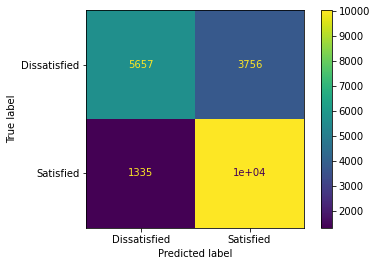

True positives: 10033 True negatives: 5657 False positives: 3756 False negatives: 1335
Accuracy score:  0.7976308780856223


"In my encodings, satisfied is represented by 1 and dissatisfied is represented by 0. In the confuion matrix plot, main \ndiagonal has the correct predictions (light blue and yellow) so we can see that many of them are predicted correctly. \nI calculated the accuracy score based on these predictions in confusion matrix and it's printed below the plot."

In [2]:
"""Some util functions for logistic regression"""

# Calculates the accuracy score
def score(y, yY):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0

    for i in range(len(y)):
        if y[i] == 1 and yY[i] == 1:
            true_pos += 1
        elif y[i] == 1 and yY[i] == 0:
            false_neg += 1
        elif y[i] == 0 and yY[i] == 1:
            false_pos += 1
        elif y[i] == 0 and yY[i] == 0:
            true_neg += 1

    pre = true_pos / (true_pos + false_pos)
    rec = true_pos / (true_pos + false_neg)
    scr = 2 * pre * rec / (pre + rec)
    return scr

# Sigmoid function is used for classification
def sigmoid(z):
    sig = 1 / (1 + np.exp(-z))
    return sig


# We need to create matrices of X to operate
def createMatrices(X):
    weights = np.zeros((np.shape(X)[1] + 1, 1))
    X = np.c_[np.ones((np.shape(X)[0], 1)), X]
    return weights, X


# Logistic Regression class is defined as in the sckitlearn library
class LogisticRegression:
    def __init__(self):
        self.weights = None

    # Fit function of our model
    def fit(self, X, y, a=0.01, iterations=5):
        weights, X = createMatrices(X)

        # Cost function is used to how well the prediction is made
        def cost(theta):
            z = np.dot(X, theta)
            cost0 = y.T.dot(np.log(sigmoid(z)))
            cost1 = (1 - y).T.dot(np.log(1 - sigmoid(z)))
            cst = -(cost1 + cost0) / len(y)
            return cst

        cost_list = np.zeros(iterations, )

        # Update weights for all iterations
        for i in range(iterations):
            weights = weights - a * np.dot(X.T, sigmoid(np.dot(X, weights)) - np.reshape(y, (len(y), 1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list

    # Make predictions
    def predict(self, X):
        _, X = createMatrices(X)
        z = np.dot(X, self.weights)

        lis = []

        # Decide class 1 if probability > 0.5 else decide class 0.
        for i in sigmoid(z):
            lis.append(1) if i > 0.5 else lis.append(0)
        return lis

# Scale the data with StandardScaler
def logisticRegression(X_train, X_test, y_train, y_test):
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)

    satisfactionReg = LogisticRegression()
    satisfactionReg.fit(X_train, y_train)

    y_pred = satisfactionReg.predict(X_test)

    # Create and plot the confusion matrix
    conf = confusion_matrix(list(y_test), y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=["Dissatisfied", "Satisfied"])
    disp.plot()
    plt.show()

    tn, fp, fn, tp = conf.ravel()

    print(f"True positives: {tp} True negatives: {tn} False positives: {fp} False negatives: {fn}")
    print("Accuracy score: ", score(y_test, y_pred))



def main():
    part1Data = read_csv("data/Part1_Invistico_Airline.csv")
    Xtr, Xts, ytr, ytst = preprocess(part1Data)
    logisticRegression(X_train=Xtr, X_test=Xts, y_train=ytr, y_test=ytst)


if __name__ == "__main__":
    main()
    
"""In my encodings, satisfied is represented by 1 and dissatisfied is represented by 0. In the confuion matrix plot, main 
diagonal has the correct predictions (light blue and yellow) so we can see that many of them are predicted correctly. 
I calculated the accuracy score based on these predictions in confusion matrix and it's printed below the plot."""

Accuracy score: 66.66666666666666
Real values:  [0 1 0 1 0 2 0 1 2 1 1 1 0 0 0 1 5 1 1 2 4 1 0 0 1 1 0 1 1 6]
Predictions:  [0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 5 0 1 1 4 0 0 1 1 1 0 1 1 6]


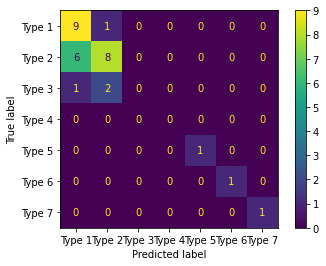

'We already know that data is unbalanced. We can observe this on the matrix below, there are no type 4. We can also\nobserve that predictions done accurately in general and most of the confusion caused by between type 1 and type 2'

In [3]:
import numpy as np
from pandas import read_csv, DataFrame
from collections import Counter
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Util function to hunt the outliers
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 2)

    return multiple_outliers


def preprocess(data):
    features = data.columns[:-1].tolist()
    # Check if are there any null values
    # print(data.isna().sum())

    # Detect and remove outliers
    outlier_indices = outlier_hunt(data[features])
    data = data.drop(outlier_indices).reset_index(drop=True)

    # Define X as features and y as labels
    X = data[features]
    y = data['Type']

    # perform a robust scaler transform of the dataset
    trans = StandardScaler()
    X = trans.fit_transform(X)

    # convert the array back to a dataframe
    X_standard = DataFrame(X)

    # set a seed and a test size for splitting the dataset
    seed = 1
    test_size = 0.2

    X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=test_size, random_state=seed)

    return X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()


"""Some util functions for multinomial logistic regression"""

# Does predictions
def predict(matrix, w, b):

    scoreMatrices = np.array([np.empty([7]) for _ in range(matrix.shape[0])])

    # Computes the prediction scores of logistic regression

    for i in range(matrix.shape[0]):
        scoreMatrices[i] = (w.dot(matrix[i].reshape(-1, 1)) + b).reshape(-1)

    return scoreMatrices


# Does softmax normalization
def softmax(matrix):

    probabilities = np.array([np.empty([7]) for _ in range(matrix.shape[0])])

    # Use the exp function to normalize

    for i in range(matrix.shape[0]):
        exp = np.exp(matrix[i])
        sumA = np.sum(exp)
        probabilities[i] = exp / sumA
    return probabilities


# Calculates the accuracy of the model
def accuracy(predictions, trueVal):

    correct = 0
    for i in range(len(predictions)):
        if predictions[i] == trueVal[i]:
            correct += 1

    acc = correct / len(predictions) * 100
    return acc

# Calculates loss of our model
def calcLoss(probabilities, target):

    num = probabilities.shape[0]
    loss = 0

    for val, i in zip(probabilities, target):
        loss += -np.log(val[i])
    loss /= num
    return loss


# Call proper functions to have the probabilities and predictions based on these probs.
def doPredictions(values, w, b):

    scores = predict(values, w, b)
    probabilities = softmax(scores)
    predictions = np.array([np.argmax(i) for i in probabilities])  # returns the outcome with max probability
    return probabilities, predictions


# Gradient function which makes iterations and tries to do better predictions

def gradientDescent(learningRate, epochs, target, values, w, b):

    target = target.astype(int)
    lossArr = np.array([])

    for i in range(epochs):
        probabilities, _ = doPredictions(values, w, b)

        loss = calcLoss(probabilities, target)
        lossArr = np.append(lossArr, loss)

        # Sub 1 from correct one
        probabilities[np.arange(values.shape[0]), target] -= 1

        # Find gradients
        gradW = probabilities.T.dot(values)
        gradB = np.sum(probabilities, axis=0).reshape(-1, 1)

        # Update matrices with gradients
        w -= (learningRate * gradW)
        b -= (learningRate * gradB)

    return w, b, lossArr


def multinomialLogisticRegression(X_train, X_test, y_train, y_test):

    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)

    # Create weight and bias matrices
    w = np.random.rand(7, 9)
    b = np.random.rand(7, 1)

    newW, newB, _ = gradientDescent(learningRate=0.001, epochs=4000, target=y_train, values=X_train, w=w, b=b)
    testProbabilities, testPredictions = doPredictions(X_test, newW, newB)

    numCorrect = 0

    # Simply calculate the accuracy by finding number of correct predictions over the number of predictions.
    for i in range(len(testPredictions)):
        if testPredictions[i] == y_test[i]:
            numCorrect += 1
    acc = numCorrect / len(testPredictions) * 100
    print(f"Accuracy score: {acc}")

    return testPredictions


def main():
    part2Data = read_csv("data/Part2_glass.csv")
    X_train, X_test, y_train, y_test = preprocess(part2Data)

    # Subtract 1 from all classes for practical purposes. Now, every class is represented with the value shortcoming.

    for i in range(len(y_train)):
        y_train[i] = y_train[i] - 1

    for i in range(len(y_test)):
        y_test[i] = y_test[i] - 1

    y_pred = multinomialLogisticRegression(X_train, X_test, y_train, y_test)

    # Create and plot the confusion matrix
    print("Real values: ", y_test)
    print("Predictions: ", y_pred)
    conf = confusion_matrix(list(y_test), y_pred, labels=[0., 1., 2., 3., 4., 5., 6.])
    disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=["Type 1", "Type 2", "Type 3", "Type 4", "Type 5", "Type 6", "Type 7"])
    disp.plot()
    plt.show()


if __name__ == "__main__":
    main()

"""We already know that data is unbalanced. We can observe this on the matrix below, there are no type 4. We can also
observe that predictions done accurately in general and most of the confusion caused by between type 1 and type 2
Accuracy score is around the given example (66.666) and it may be improved by changing the learning rate or epochs."""